# စိန်ခေါ်မှု - ဒေတာသိပ္ပံအကြောင်း စာသားကို ခွဲခြမ်းစိတ်ဖြာခြင်း

ဤဥပမာတွင်၊ ဒေတာသိပ္ပံလုပ်ငန်းစဉ်၏ ရိုးရာအဆင့်ဆင့်အားလုံးကို အကျုံးဝင်သော ရိုးရှင်းသော လေ့ကျင့်ခန်းတစ်ခု ပြုလုပ်ကြမည်။ သင်သည် အောက်တွင်ရှိသော ဆဲလ်များကို နှိပ်၍ အလုပ်လုပ်စေပြီး ရလဒ်ကို ကြည့်ရှုနိုင်သည်။ စိန်ခေါ်မှုအနေနှင့်၊ သင်သည် အခြားဒေတာများဖြင့် ဤကုဒ်ကို စမ်းသပ်ကြည့်ရန် အားပေးလိုက်ပါသည်။

## ရည်မှန်းချက်

ဤသင်ခန်းစာတွင်၊ ဒေတာသိပ္ပံနှင့်ဆိုင်သော အမျိုးမျိုးသော အယူအဆများကို ဆွေးနွေးခဲ့ပါသည်။ **စာသားသိပ္ပံ** ပြုလုပ်ခြင်းအားဖြင့် ပိုမိုဆက်စပ်သော အယူအဆများကို ရှာဖွေကြည့်ရအောင်။ ဒေတာသိပ္ပံအကြောင်း စာသားတစ်ခုကို စတင်၍၊ ထိုမှ အဓိကသော စကားလုံးများကို ထုတ်ယူပြီး၊ ရလဒ်ကို ရှုထောင့်တစ်ခုမှ ကြည့်ရှုကြည့်မည်။

စာသားအဖြစ်၊ ငါသည် Wikipedia တွင်ရှိသော ဒေတာသိပ္ပံအကြောင်း စာမျက်နှာကို အသုံးပြုမည် - 


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## အဆင့် ၁: ဒေတာရယူခြင်း

ဒေတာသိပ္ပံလုပ်ငန်းစဉ်တိုင်း၏ ပထမဆုံးအဆင့်မှာ ဒေတာရယူခြင်းဖြစ်ပါတယ်။ ဒါကိုလုပ်ရန် `requests` လိုက်ဘရေးရီကို အသုံးပြုမယ်:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## အဆင့် ၂: ဒေတာကို ပြောင်းလဲခြင်း

နောက်ထပ်အဆင့်မှာ ဒေတာကို အလုပ်လုပ်ရန် သင့်တော်သော ပုံစံသို့ ပြောင်းလဲရမည်ဖြစ်သည်။ ကျွန်ုပ်တို့၏အနေဖြင့်၊ စာမျက်နှာမှ HTML အရင်းအမြစ်ကုဒ်ကို ဒေါင်းလုဒ်လုပ်ပြီး၊ ၎င်းကို ပုံမှန်စာသားအဖြစ် ပြောင်းလဲရန် လိုအပ်ပါသည်။

ဤအရာကို ပြုလုပ်နိုင်သော နည်းလမ်းများစွာ ရှိပါသည်။ ကျွန်ုပ်တို့သည် Python မှ အလွယ်ဆုံးပါဝင်ထားသော [HTMLParser](https://docs.python.org/3/library/html.parser.html) အရာဝတ္ထုကို အသုံးပြုမည်ဖြစ်သည်။ `HTMLParser` အတန်းကို အခြေခံပြီး၊ `<script>` နှင့် `<style>` တိုင်များကို မပါဝင်စေဘဲ HTML တိုင်များအတွင်းရှိ စာသားအားလုံးကို စုဆောင်းမည့် ကုဒ်ကို သတ်မှတ်ရမည်ဖြစ်သည်။


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## အဆင့် ၃ - အချက်အလက်များ ရယူခြင်း

အရေးကြီးဆုံးအဆင့်မှာ ကျွန်တော်တို့ရဲ့ ဒေတာကို အချက်အလက်များရယူနိုင်တဲ့ အခြေအနေတစ်ခုအဖြစ် ပြောင်းလဲဖို့ ဖြစ်ပါတယ်။ ကျွန်တော်တို့ရဲ့ အခြေအနေမှာတော့ စာသားထဲက keyword တွေကို ထုတ်ယူပြီး ဘယ် keyword တွေက ပိုအရေးပါလဲဆိုတာကို ကြည့်ချင်ပါတယ်။

ကျွန်တော်တို့ Python library [RAKE](https://github.com/aneesha/RAKE) ကို keyword ထုတ်ယူဖို့ အသုံးပြုပါမယ်။ အရင်ဆုံး ဒီ library ရှိမရှိ စစ်ဆေးပြီး မရှိရင် ထည့်သွင်းပါ:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


အဓိကလုပ်ဆောင်ချက်ကို `Rake` အရာဝတ္ထုမှရရှိနိုင်ပြီး၊ ၎င်းကိုအချို့သောပါရာမီတာများကိုအသုံးပြု၍စိတ်ကြိုက်ပြင်ဆင်နိုင်ပါသည်။ ကျွန်ုပ်တို့၏အမှုအတွက်၊ keyword ၏အနည်းဆုံးအရှည်ကိုအက္ခရာ ၅ လုံး၊ စာရွက်စာတမ်းအတွင်း keyword ၏အနည်းဆုံးကြိမ်နှုန်းကို ၃ ကြိမ်နှင့် keyword အတွင်းစကားလုံးအများဆုံးအရေအတွက်ကို ၂ စကားလုံးအထိသတ်မှတ်ပါမည်။ အခြားသောတန်ဖိုးများနှင့်အတူစမ်းသပ်ကြည့်ပြီးရလဒ်ကိုလေ့လာနိုင်ပါသည်။


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

ကျွန်တော်တို့ အရေးပါမှုအဆင့်အလိုက် စာရင်းတစ်ခုရရှိခဲ့ပြီး၊ အဓိကကျသော အခန်းကဏ္ဍများ (ဥပမာ - machine learning နှင့် big data) စသည်တို့ကို စာရင်း၏ ထိပ်ဆုံးနေရာများတွင် တွေ့နိုင်ပါသည်။

## အဆင့် ၄ - ရလဒ်ကို မြင်သာအောင် ဖော်ပြခြင်း

လူတွေက ဒေတာကို မြင်သာတဲ့ပုံစံနဲ့ အကောင်းဆုံးနားလည်နိုင်ပါတယ်။ ဒါကြောင့် အမြင်အာရုံကနေ အချက်အလက်တွေကို ဆွဲထုတ်နိုင်ဖို့ ဒေတာကို မြင်သာအောင် ဖော်ပြခြင်းက အဓိကကျပါတယ်။ Python ရဲ့ `matplotlib` library ကို အသုံးပြုပြီး keyword တွေကို အရေးပါမှုအလိုက် ရိုးရိုးရှင်းရှင်း ပုံဖော်နိုင်ပါတယ်။


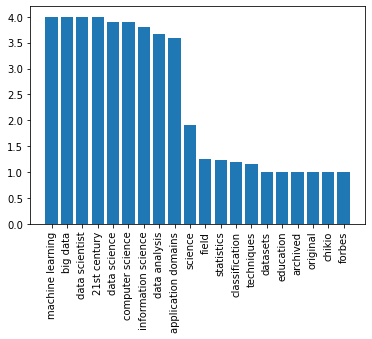

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

သို့သော်လည်း၊ စကားလုံးအကြိမ်ရေများကို မြင်သာစေရန် ပိုမိုကောင်းမွန်သောနည်းလမ်းတစ်ခုရှိပါသည် - **Word Cloud** ကို အသုံးပြုခြင်းဖြစ်သည်။ ကျွန်ုပ်တို့၏ စကားလုံးစာရင်းမှ word cloud ကို ရှုထောင့်ဖော်ဆောင်ရန် အခြားစာကြည့်တိုက်တစ်ခုကို ထည့်သွင်းရန် လိုအပ်ပါမည်။


In [71]:
!{sys.executable} -m pip install wordcloud

`WordCloud` အရာဝတ္ထုသည် မူရင်းစာသား သို့မဟုတ် ၎င်းတို့၏ကြိမ်နှုန်းများနှင့်အတူ ကြိုတင်တွက်ချက်ထားသော စာလုံးများစာရင်းကို လက်ခံပြီး၊ ပြန်လည်ပုံဖော်ထားသော ပုံရိပ်ကို ထုတ်ပေးပြီး၊ ၎င်းကို `matplotlib` ကို အသုံးပြု၍ ပြသနိုင်သည်။


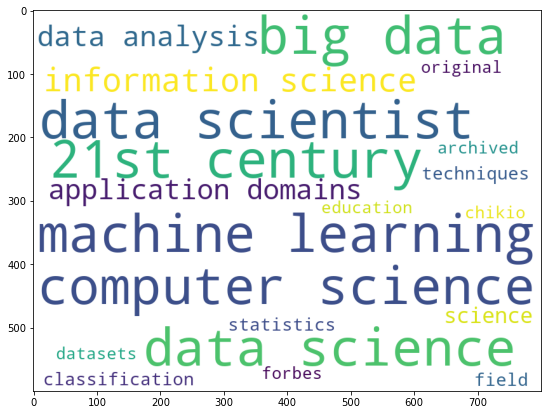

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

ကျွန်ုပ်တို့ `WordCloud` သို့ မူရင်းစာသားကိုလည်း ဖြတ်သွားနိုင်ပါသည် - အနည်းငယ်တူညီသောရလဒ်ကိုရနိုင်မလားဆိုတာကြည့်ကြရအောင်:


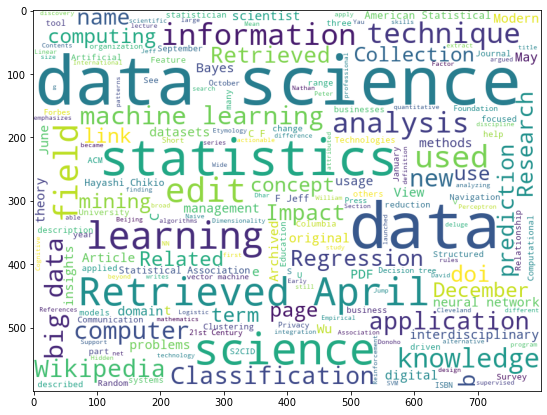

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

သင်ကြည့်နိုင်ပါပြီ၊ word cloud ဟာ အခုပိုမိုအထင်ကြီးဖွယ်ရှိလာပြီး noise (ဥပမာ- `Retrieved on` ကဲ့သို့ မသက်ဆိုင်သော စကားလုံးများ) များပါဝင်နေသည်ကိုလည်း တွေ့ရပါသည်။ ထို့အပြင် *data scientist* သို့မဟုတ် *computer science* ကဲ့သို့သော နှစ်လုံးပါသော keyword များကို ပိုမိုနည်းလာသည်ကိုလည်း တွေ့ရသည်။ ဒါဟာ RAKE algorithm က text ထဲမှ ကောင်းမွန်သော keyword များကို ရွေးချယ်ရာတွင် ပိုမိုကောင်းမွန်သော အလုပ်လုပ်ပေးနိုင်သောကြောင့် ဖြစ်ပါသည်။ ဤဥပမာသည် data pre-processing နှင့် cleaning ရဲ့ အရေးကြီးမှုကို ဖော်ပြပေးပြီး၊ နောက်ဆုံးတွင် ရှင်းလင်းသော ပုံရိပ်ကို ရရှိခြင်းက ပိုမိုကောင်းမွန်သော ဆုံးဖြတ်ချက်များကို ချမှတ်နိုင်စေမည်ဖြစ်သည်။

ဤလေ့ကျင့်ခန်းတွင် Wikipedia text မှ keyword များနှင့် word cloud အဖြစ် အဓိပ္ပါယ်တစ်စုံတစ်ရာကို ထုတ်ယူခြင်းဆိုင်ရာ ရိုးရှင်းသော လုပ်ငန်းစဉ်တစ်ခုကို ကျော်ဖြတ်ခဲ့ပါသည်။ ဤဥပမာသည် ရိုးရှင်းသော်လည်း၊ data scientist တစ်ဦးအနေဖြင့် data နှင့် အလုပ်လုပ်ရာတွင် လိုက်နာရမည့် ရိုးရာအဆင့်များအားလုံးကို ကောင်းစွာ ဖော်ပြပေးနိုင်ပါသည်။ ဒါဟာ data acquisition မှ visualization အထိ ဖြစ်ပါသည်။

ကျွန်ုပ်တို့၏ သင်တန်းတွင် အဆင့်အားလုံးကို အသေးစိတ် ဆွေးနွေးသွားမည်ဖြစ်သည်။



---

**ဝက်ဘ်ဆိုက်မှတ်ချက်**:  
ဤစာရွက်စာတမ်းကို AI ဘာသာပြန်ဝန်ဆောင်မှု [Co-op Translator](https://github.com/Azure/co-op-translator) ကို အသုံးပြု၍ ဘာသာပြန်ထားပါသည်။ ကျွန်ုပ်တို့သည် တိကျမှန်ကန်မှုအတွက် ကြိုးစားနေပါသော်လည်း၊ အလိုအလျောက်ဘာသာပြန်မှုများတွင် အမှားများ သို့မဟုတ် မတိကျမှုများ ပါဝင်နိုင်သည်ကို ကျေးဇူးပြု၍ သတိပြုပါ။ မူရင်းစာရွက်စာတမ်းကို ၎င်း၏ မူလဘာသာစကားဖြင့် အာဏာတည်သောရင်းမြစ်အဖြစ် သတ်မှတ်သင့်ပါသည်။ အရေးကြီးသော အချက်အလက်များအတွက် လူ့ဘာသာပြန်ပညာရှင်များမှ ပြန်ဆိုမှုကို အကြံပြုပါသည်။ ဤဘာသာပြန်မှုကို အသုံးပြုခြင်းမှ ဖြစ်ပေါ်လာသော နားလည်မှုမှားများ သို့မဟုတ် အဓိပ္ပာယ်မှားများအတွက် ကျွန်ုပ်တို့သည် တာဝန်မယူပါ။ 
